In [71]:
import pandas as pd
import matplotlib.pyplot as plt

from explore_data import get_data

df = get_data()
df["date"] = pd.to_datetime(df["date"])

In [72]:
# keep only most cases of each state
df = df.sort_values(by=["state", "cases"], ascending=False)
df = df.drop_duplicates(subset=["state"], keep="first")
df.head()

,id,date,state,abbr,location,cases,death,season
2060078,WY0375099,2022-02-28,Wyoming,WY,Laramie,25904,273,winter2
2031525,WI0149896,2022-02-28,Wisconsin,WI,Milwaukee,266346,2094,winter2
2180134,WV1485342,2022-02-28,West Virginia,WV,Kanawha,46589,669,winter2
2060071,WA0375092,2022-02-28,Washington,WA,King,365871,2530,winter2
2278347,VA2277118,2022-02-28,Virginia,VA,Fairfax,172659,1370,winter2


In [73]:
# show relationship between cases and deaths for each state

# Create a list of states and their corresponding cases
states = df["state"].unique()
cases = {
    state: {
        "cases": df[df["state"] == state]["cases"].values[0],
        "deaths": df[df["state"] == state]["death"].values[0],
    }
    for state in states
}

# to dataframe
df = pd.DataFrame.from_dict(cases, orient="index")
# add state column
df["state"] = df.index
# reset index
df = df.reset_index(drop=True)

In [75]:
cdf = df.copy()
cdf

,cases,deaths,state
0,25904,273,Wyoming
1,266346,2094,Wisconsin
2,46589,669,West Virginia
3,365871,2530,Washington
4,172659,1370,Virginia
5,25935,156,Vermont
6,339132,1543,Utah
7,992400,10667,Texas
8,234053,3154,Tennessee
9,56782,499,South Dakota


In [84]:
import plotly.express as px

data = cdf.copy()

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='cases', y='deaths', z=data.index, hover_name='state',
                    title="3D Scatter Plot of Cases, Deaths, and States")
fig.update_traces(marker=dict(size=5))  # Adjust the marker size

# Customize the layout
fig.update_layout(scene=dict(xaxis_title='Cases', yaxis_title='Deaths', zaxis_title='State'))

# Save the plot to an HTML file
fig.write_html("dist/scatter_plot.html")

In [46]:
# Create a list of states and their corresponding cases
states = df["state"].unique()
cases = {state: df[df["state"] == state]["cases"].values[0] for state in states}

# to dataframe
df = pd.DataFrame.from_dict(cases, orient="index", columns=["cases"])

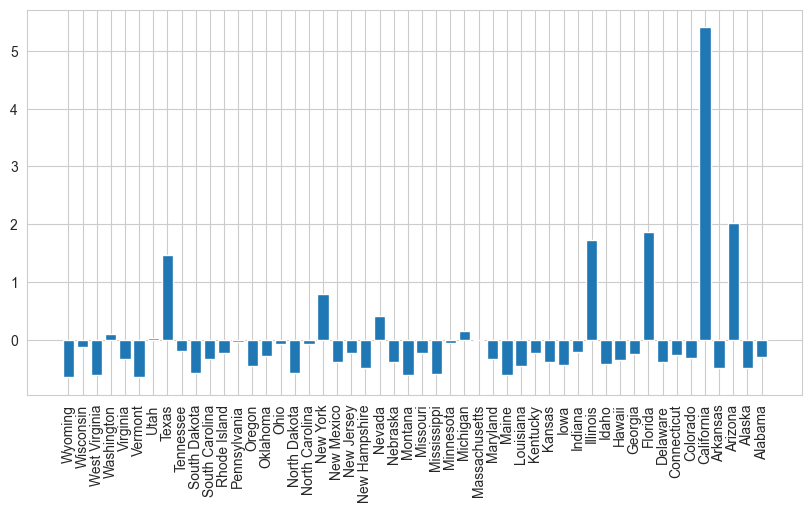

In [15]:
# z-score
df["zscore"] = (df["cases"] - df["cases"].mean()) / df["cases"].std()

plt.figure(figsize=(10, 5))
plt.bar(df.index, df["zscore"])
plt.xticks(rotation=90)
plt.show()

In [47]:
# set index to state
df = df.reset_index().rename(columns={"index": "state"})
# Create a list of states and their corresponding cases
df

,state,cases
0,Wyoming,25904
1,Wisconsin,266346
2,West Virginia,46589
3,Washington,365871
4,Virginia,172659
5,Vermont,25935
6,Utah,339132
7,Texas,992400
8,Tennessee,234053
9,South Dakota,56782


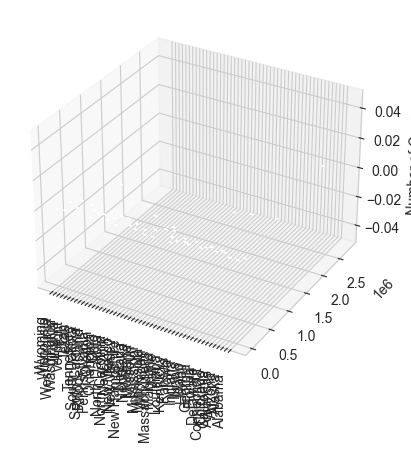

In [51]:
import numpy as np

data = df.copy()

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create the 3D bar graph
x = np.arange(len(data["state"]))  # X positions
y = np.zeros(len(data["state"]))  # Y positions (all zeros in this case)
z = data["cases"]  # Heights

ax.bar(x, y, z, zdir="y")

# Customize the plot
ax.set_xlabel("State")
ax.set_zlabel("Number of Cases")

# Set the states as tick labels on the x-axis
ax.set_xticks(x)
ax.set_xticklabels(data["state"], rotation=90)

# Show the plot
plt.show()